WORKING WITH 2015 TO TILL DATE 25/4/13 DATA

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
df = pd.read_excel('dataset/ETH_15_25.xlsx')
df.rename(columns={"timestamp":"Date"},inplace=True)
df.head()

,close,Date
0,0.753325,2015-08-09
1,0.701897,2015-08-10
2,0.708448,2015-08-11
3,1.067860,2015-08-12
4,1.217440,2015-08-13


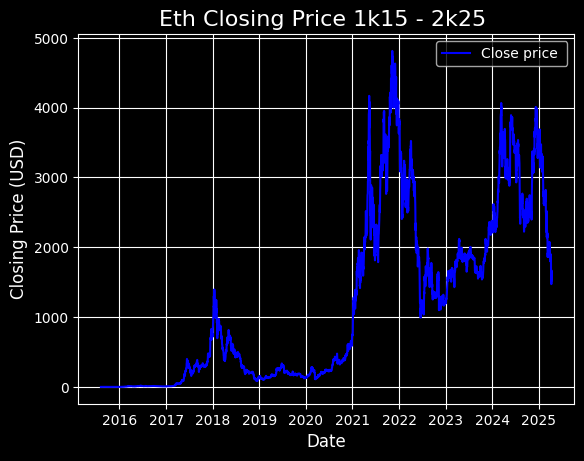

In [19]:
df = df.set_index('Date') # We are setting Date As index for out lstm

plt.style.use('dark_background')
plt.plot(df.index,df["close"],label="Close price ",color="blue")
plt.title('Eth Closing Price 1k15 - 2k25 ', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.grid(True)
plt.legend()


In [20]:
df.head() 

,close
Date,
2015-08-09,0.753325
2015-08-10,0.701897
2015-08-11,0.708448
2015-08-12,1.067860
2015-08-13,1.217440


In [21]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


In [22]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [24]:
# If df is already loaded and 'Date' is index
df = df[['close']]  # Ensure only Close column
df.index = pd.to_datetime(df.index)  # Just to be safe


In [25]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)


In [26]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

sequence_length = 60  # You can change this
X, y = create_sequences(scaled_data, sequence_length)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [27]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


c:\Users\shiva\Downloads\work\Ml_models\virtual\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.fit(X, y, epochs=10, batch_size=32)


Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0134
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0013
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0011
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0010
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 9.0392e-04
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 7.2090e-04
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 6.0357e-04
Epoch 8/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 5.6064e-04
Epoch 9/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 5.3698e-04
Epoch 10/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 4.7508e-04


In [29]:
last_60_days = scaled_data[-60:]
last_60_days = np.reshape(last_60_days, (1, 60, 1))
predicted = model.predict(last_60_days)
predicted_price = scaler.inverse_transform(predicted)

print("Next predicted value:", predicted_price[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
Next predicted value: 1545.3208


Prediction Using Past 7 Years ETH Data 

Epoch 1/10


c:\Users\shiva\Downloads\work\Ml_models\virtual\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0342
Epoch 2/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0016
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0014
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0013
Epoch 5/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0011
Epoch 6/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 8.7770e-04
Epoch 7/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 9.5062e-04
Epoch 8/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 8.4597e-04
Epoch 9/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 7.4912e-04
Epoch 10/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 7.0053e-04


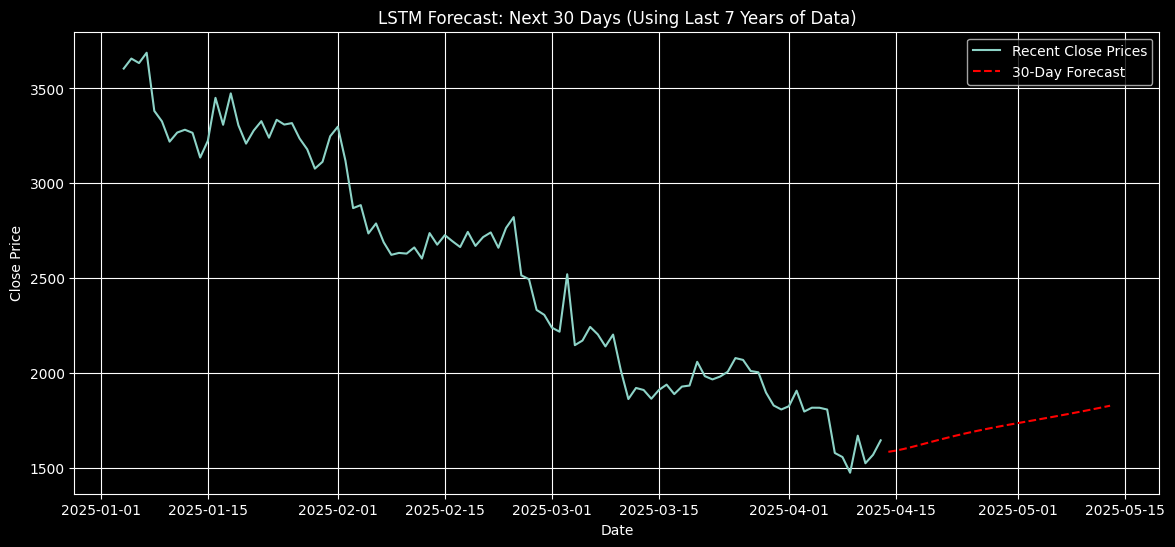

            Predicted_Close
Date                       
2025-04-14      1582.871094
2025-04-15      1589.286499
2025-04-16      1597.869629
2025-04-17      1607.680420
2025-04-18      1618.123047
2025-04-19      1628.810547
2025-04-20      1639.482788
2025-04-21      1649.963623
2025-04-22      1660.131226
2025-04-23      1669.912231
2025-04-24      1679.270508
2025-04-25      1688.197021
2025-04-26      1696.713379
2025-04-27      1704.859741
2025-04-28      1712.686279
2025-04-29      1720.253174
2025-04-30      1727.625366
2025-05-01      1734.865356
2025-05-02      1742.033447
2025-05-03      1749.182373
2025-05-04      1756.361450
2025-05-05      1763.607056
2025-05-06      1770.949341
2025-05-07      1778.409790
2025-05-08      1786.002197
2025-05-09      1793.732910
2025-05-10      1801.604614
2025-05-11      1809.613037
2025-05-12      1817.749146
2025-05-13      1826.003540


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# -----------------------------
# 1. Load Data
# -----------------------------
# Assuming you already have df loaded with columns 'Date' and 'close'

# Make sure Date is datetime and set as index
df.index = pd.to_datetime(df.index)

# -----------------------------
# 2. Filter Last 7 Years
# -----------------------------
df = df[['close']]  # Keep only close column
last_7_years = df[df.index >= pd.to_datetime('today') - pd.DateOffset(years=7)]

# -----------------------------
# 3. Normalize the Data
# -----------------------------
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(last_7_years)

# -----------------------------
# 4. Create Sequences
# -----------------------------
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, 60)
X = X.reshape((X.shape[0], X.shape[1], 1))

# -----------------------------
# 5. Build and Train LSTM Model
# -----------------------------
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=10, batch_size=32)

# -----------------------------
# 6. Predict Next 30 Days
# -----------------------------
last_sequence = scaled_data[-60:]
future_predictions = []

for _ in range(30):
    input_seq = np.reshape(last_sequence, (1, 60, 1))
    pred = model.predict(input_seq, verbose=0)
    future_predictions.append(pred[0][0])
    last_sequence = np.append(last_sequence, pred)[1:]

# Inverse transform predictions
predicted_prices = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# -----------------------------
# 7. Create Future DataFrame
# -----------------------------
last_date = last_7_years.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Close': predicted_prices.flatten()
})
forecast_df.set_index('Date', inplace=True)

# -----------------------------
# 8. Plot Results
# -----------------------------
plt.figure(figsize=(14, 6))
plt.plot(last_7_years.index[-100:], last_7_years['close'].values[-100:], label='Recent Close Prices')
plt.plot(forecast_df.index, forecast_df['Predicted_Close'], label='30-Day Forecast', linestyle='--',color="red")
plt.title('LSTM Forecast: Next 30 Days (Using Last 7 Years of Data)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Optional: print forecast table
print(forecast_df)


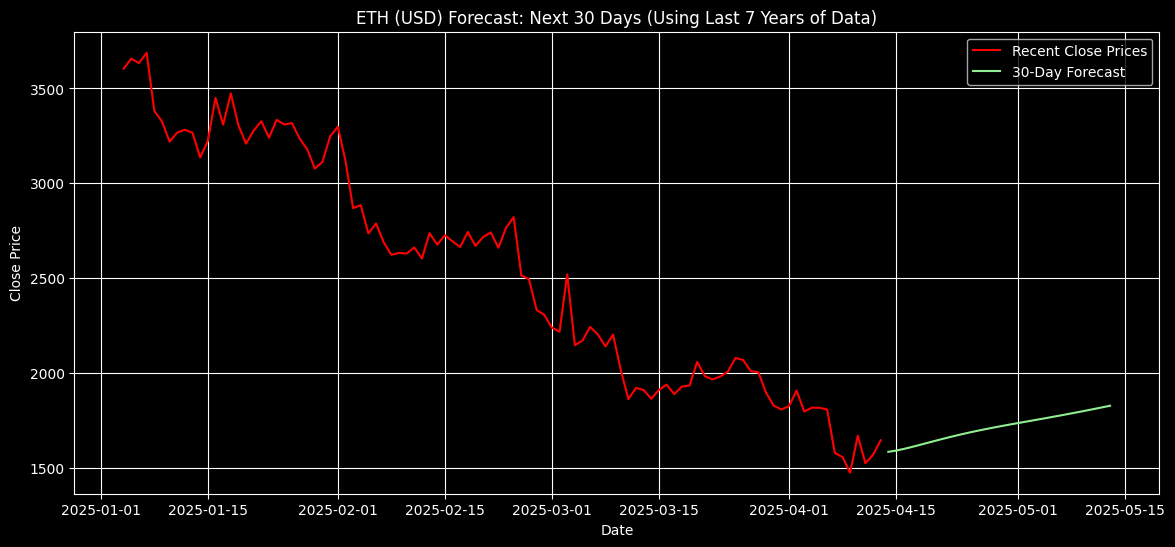

In [34]:
plt.figure(figsize=(14, 6))
plt.plot(last_7_years.index[-100:], last_7_years['close'].values[-100:], label='Recent Close Prices',color="red")
plt.plot(forecast_df.index, forecast_df['Predicted_Close'], label='30-Day Forecast',color="lightgreen")
plt.title('ETH (USD) Forecast: Next 30 Days (Using Last 7 Years of Data)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
forecast_df

,Predicted_Close
Date,
2025-04-14,1631.900146
2025-04-15,1638.252563
2025-04-16,1650.514526
2025-04-17,1666.292358
2025-04-18,1684.099609
2025-04-19,1703.016357
2025-04-20,1722.475464
2025-04-21,1742.126587
2025-04-22,1761.759766
